# Cow Data

The data for the cow is in two files, `cow.csv` and `cow_data_xyz_time_resampled.csv`.

The first contains the observations of when the cow ran or walked, the second contains the raw acceleratometer data.

I've not written any code for performing classification. It's up to you to see if you can predict when the cow was running!

Note on the 'activity' field of `cow.csv`. It can take 7 possible values:

    r = running
    s = stopped
    w = walking
    m = mooing!
    i = itching
    e = eating
    f = fighting

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta

In [40]:
def getaligned_activities_and_stds():
    labels = pd.read_csv('cow.csv')
    raw = pd.read_csv('cow_data_xyz_time_resampled.csv')

    accelstds = []
    chunksize = 100
    epoch = datetime.utcfromtimestamp(0)

    activity_times = []
    activities = []
    aligned_acts = []
    times = []
    for i,label in labels.iterrows():
        dt = datetime(2017,7,22,label.hour,label.minute,label.second)
        activity_times.append(dt)
        activities.append(label.Activity)

    current = 0
    for chunk in range(0,len(raw),chunksize):
        chunktime = datetime.strptime(raw['time_resampled'][chunk], '%Y-%m-%dT%H:%M:%S.%f')+timedelta(hours=3)
        #get the activities aligned with the accel times
        while ((activity_times[current]-epoch).total_seconds() - (chunktime-epoch).total_seconds()<0):
            current+=1
            if current>=len(activity_times):
                return times, aligned_acts, accelstds
        aligned_acts.append(activities[current])
        #just find the mean acceleramoeter standard deviation (over all axes)
        accelstds.append(np.sqrt(np.var(raw[chunk:(chunk+chunksize)].x)+np.var(raw[chunk:(chunk+chunksize)].y)+np.var(raw[chunk:(chunk+chunksize)].z)))
        times.append((chunktime-epoch).total_seconds())
    return times, aligned_acts, accelstds

In [41]:
times, acts, accelstds = getaligned_activities_and_stds()

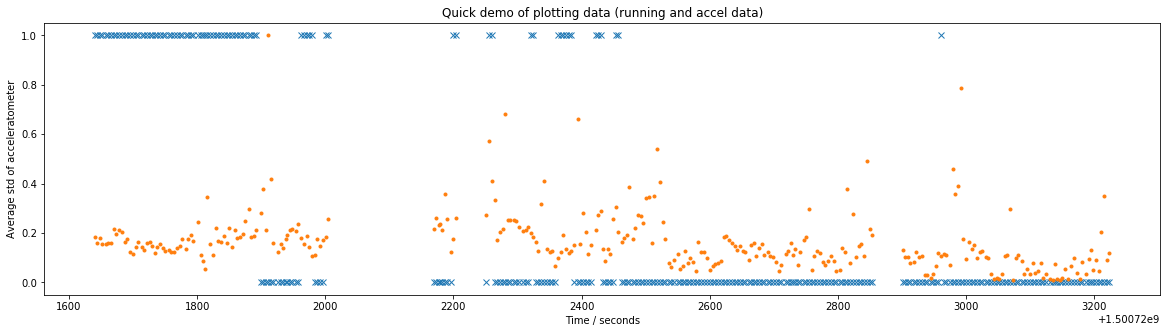

In [44]:
plt.figure(figsize=[20,5])
plt.plot(times, np.array(acts)=='r','x')
plt.plot(times, accelstds/np.max(accelstds),'.')
plt.xlabel('Time / seconds')
plt.ylabel('Average std of acceleratometer')
plt.title('Quick demo of plotting data (running and accel data)')

(-2, 3)

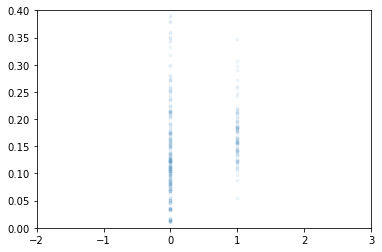

In [19]:
plt.plot(np.array(acts)=='r',accelstds/np.max(accelstds),'.',alpha=0.05)
plt.ylim([0,0.4])
plt.xlim([-2,3])

### Things to try:

- Why not start by looking at the seperate axes of the accelermometer?
- How will you prepare the data for the classifier? (maybe think about what features of the time series are useful?)

In [45]:
raw = pd.read_csv('cow_data_xyz_time_resampled.csv')

(-1000, 1000)

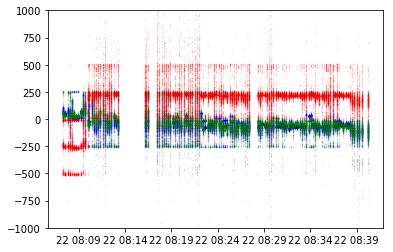

In [58]:
plt.plot([datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%f') for t in raw['time']],raw['x'],'.b',markersize=1,alpha=0.1)
plt.plot([datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%f') for t in raw['time']],raw['y'],'.g',markersize=1,alpha=0.1)
plt.plot([datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%f') for t in raw['time']],raw['z'],'.r',markersize=1,alpha=0.1)
plt.ylim([-1000,1000])

In [59]:
pd.read_csv('cow.csv')


hour  minute  second Activity
0     11      11      37        r
1     11      11      43        s
2     11      11      52        w
3     11      11      56        s
4     11      12       1        w
5     11      12      29        s
6     11      12      36        w
7     11      12      40        s
8     11      13       3        r
9     11      13      20        w
10    11      13      52        r
11    11      14       9        s
12    11      14      13        r
13    11      14      27        s
14    11      14      35        r
15    11      14      37        s
16    11      14      48        r
17    11      15       8        m
18    11      15      43        m
19    11      16      34        s
20    11      16      38        w
21    11      16      50        r
22    11      17      32        w
23    11      17      44        r
24    11      17      48        w
25    11      18      35        s
26    11      18      39        w
27    11      18      46        r
28    11      18      49        s
29    11      18      59        m
..   ...     ...     ...      ...
53    11      24      14        w
54    11      24      28        s
55    11      25       0        w
56    11      25      10        s
57    11      25      25        e
58    11      25      55        w
59    11      25      59        s
60    11      26       6        m
61    11      26      11        w
62    11      26      20        s
63    11      26      45        e
64    11      27       0        s
65    11      27      15        w
66    11      27      45        s
67    11      28      14        w
68    11      28      17        s
69    11      28      24        e
70    11      28      29        w
71    11      28      38        s
72    11      29       4        w
73    11      29      18        s
74    11      29      24        r
75    11      29      44        s
76    11      30      11        i
77    11      31      13        w
78    11      31      14        s
79    11      32      50        i
80    11      33      25        f
81    11      33      45        w
82    11      33      47        s

[83 rows x 4 columns]